In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

eth_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_ETHUSDT_d_Shortened.csv')
bitq_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\BITQ.csv')

#Quick check
eth_data.head()
#bitq_data.head()

,unix,Date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
0,1.640000e+12,21 01 2022,ETH/USDT,3001.48,3008.97,2972.70,2995.99,10440.7740,3.120522e+07,23981
1,1.640000e+12,20 01 2022,ETH/USDT,3084.02,3273.37,2987.15,3001.48,357596.7062,1.124982e+09,718946
2,1.640000e+12,19 01 2022,ETH/USDT,3159.85,3174.87,3000.00,3084.02,332996.5703,1.035250e+09,647383
3,1.640000e+12,18 01 2022,ETH/USDT,3209.68,3243.87,3082.00,3159.85,299134.2728,9.431408e+08,579484
4,1.640000e+12,17 01 2022,ETH/USDT,3346.89,3357.57,3141.10,3209.67,284063.6548,9.225686e+08,646419


In [8]:
#Collecting dates and closing prices from the data
db_eth = eth_data.iloc[:,[1,6]]
db_bitq = bitq_data.iloc[:,[0,5]]

#Merging crypto data on the date
ETHxBITQ = pd.merge(db_eth, db_bitq,on='Date', how='inner')
ETHxBITQ

#Renaming the columns
cols = {'close':'ETH','Adj Close':'BITQ'}
ExB = ETHxBITQ.rename(columns =cols, inplace= False)
#ExB

#Setting the index as the date
ExB.set_index('Date',inplace=True, drop=True)
ExB

,ETH,BITQ
Date,,
21 01 2022,2995.99,15.260000
20 01 2022,3001.48,17.379999
19 01 2022,3084.02,17.360001
18 01 2022,3159.85,17.639999
14 01 2022,3307.42,19.180000
...,...,...
18 05 2021,3375.07,21.661709
17 05 2021,3282.51,21.768702
14 05 2021,4075.01,22.683027


<AxesSubplot:xlabel='Date'>

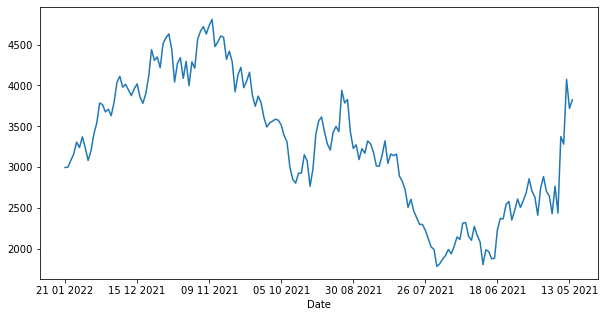

In [7]:
ExB['ETH'].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

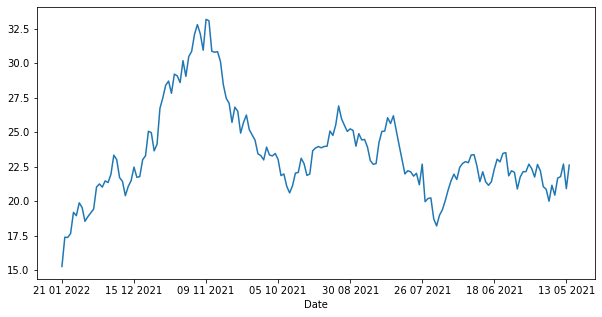

In [16]:
ExB['BITQ'].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

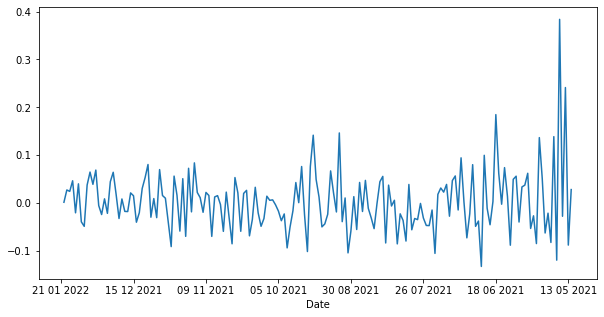

In [9]:
#Simple rate of return
ExB['Simple return ETH'] = (ExB['ETH']/ExB['ETH'].shift(1)) - 1
ExB['Simple return ETH'].plot(figsize=(10,5))

#How to plot an average line on the graph
#How to plot a line on zero

<AxesSubplot:xlabel='Date'>

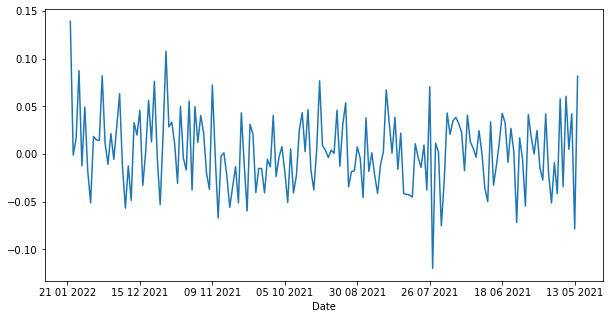

In [17]:
#Simple rate of return
ExB['Simple return BITQ'] = (ExB['BITQ']/ExB['BITQ'].shift(1)) - 1
ExB['Simple return BITQ'].plot(figsize=(10,5))

#How to plot an average line on the graph
#How to plot a line on zero

In [18]:
#The average daily rate of return in a percentage
print('ETH average daily returns = ' + str(round(ExB['Simple return ETH'].mean(),5)*100) + '%')

#The average yearly rate of return in a percentage (Assuming there is an average of 250 trading days in a year)
print('ETH average annual returns = ' + str(round(ExB['Simple return ETH'].mean()*250,5)*100) + '%' + '\n')

#The average daily rate of return in a percentage
print('BITQ average daily returns = ' + str(round(ExB['Simple return BITQ'].mean(),5)*100) + '%')

#The average yearly rate of return in a percentage (Assuming there is an average of 250 trading days in a year)
print('BITQ average annual returns = ' + str(round(ExB['Simple return BITQ'].mean()*250,5)*100) + '%')

ETH average daily returns = 0.331%
ETH average annual returns = 82.772%

BITQ average daily returns = 0.297%
BITQ average annual returns = 74.307%


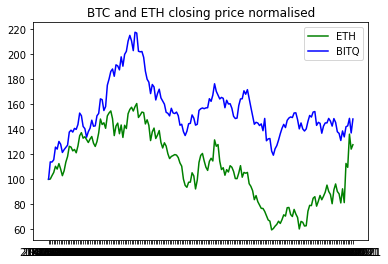

<Figure size 720x360 with 0 Axes>

In [19]:
#Normalised data (Normalising the two graphs to see if the closing prices tracked eachother over time)
x1 = ExB['ETH']/ExB['ETH'].iloc[0]*100
x2 = ExB['BITQ']/ExB['BITQ'].iloc[0]*100

plt.figure(figsize=(10,5))
plt.plot(x1,c='green',label='ETH')
plt.plot(x2,c='blue',label='BITQ')
plt.title('BTC and ETH closing price normalised')
plt.style.use('tableau-colorblind10')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

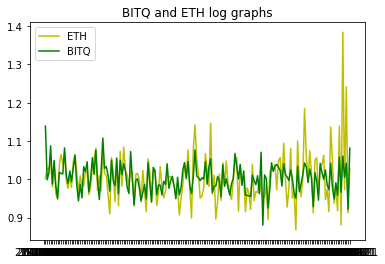

In [26]:
# Log graphs
ExB['Simple log return ETH'] = np.log(ExB['ETH']/ExB['ETH'].shift(1))
ExB['Simple log return BITQ'] = np.log(ExB['BITQ']/ExB['BITQ'].shift(1))

plt.figure(figsize=(10,5))
plt.plot(log_eth,'-y',label='ETH')
plt.plot(log_bitq,'-g',label='BITQ')
plt.title('BITQ and ETH log graphs')
plt.legend()
plt.show

In [28]:
#The average daily rate of return in a percentage
print('ETH average daily log returns = ' + str(round(ExB['Simple log return ETH'].mean(),4)*100) + '%')

#The average yearly rate of return in a percentage (Assuming there is an average of 250 trading days in a year)
print('ETH average annual log returns = ' + str(round(ExB['Simple log return ETH'].mean()*250,5)*100) + '%' + '\n')

#The average daily rate of return in a percentage
print('BITQ average daily log returns = ' + str(round(ExB['Simple log return BITQ'].mean(),5)*100) + '%')

#The average yearly rate of return in a percentage (Assuming there is an average of 250 trading days in a year)
print('BITQ average annual log returns = ' + str(round(ExB['Simple log return BITQ'].mean()*250,5)*100) + '%')

ETH average daily log returns = 0.13999999999999999%
ETH average annual log returns = 34.633%

BITQ average daily log returns = 0.22300000000000003%
BITQ average annual log returns = 55.816%


In [9]:
# Calculating the covarieance
cov = ExB.cov() *250
cov

,ETH,BITQ
ETH,1.592480e+08,439345.790541
BITQ,4.393458e+05,2729.324504


In [10]:
#
ExB.corr()

,ETH,BITQ
ETH,1.00000,0.66641
BITQ,0.66641,1.00000


In [11]:
# Calculating the securities Beta
# The riskier the stock the higher the Beta
cov_with_market = cov.iloc[0,1]

eth_market_var = ExB['ETH'].var()*250

ETH_beta = cov_with_market / eth_market_var
ETH_beta



0.0027588771331931417